<font size = 5>**LAB 8**</font>

<font size = 4>**QUESTION 1**</font>

1 . For the function J(w) = w^2 + (54/w), implement the following methods: (a) Use the bracketed value (that you got in the last lab) to get to the critical point employing interval halving method and (b) identify the critical point using Newton-Raphson method and (c) verify the result manually using the optimality criteria (post this write-up as well in .jpg/.png etc).

In [1]:
import numpy as np

def J(w):
    return w**2 + 54/w

a = 1
b = 200
n = 200

x_vals = np.linspace(a,b,n)

for i in range(1,n-1):
    w1 = x_vals[i-1]
    w2 = x_vals[i]
    w3 = x_vals[i+1]
    if(J(w1) >= J(w2) and J(w2) <= J(w3)):
        a = w1
        b = w3
        break

#The range is now refined and stored in a,b 
print("Refined search interval by bracketing method",a,b)

Refined search interval by bracketing method 2.0 4.0


In [2]:
#a) To employ interval halving now ! 

#Epsilon set to small value
e = 1e-10

#Interval halving done till the interval is less than epsilon
#Please run the above cell Once before running this cell

while(b - a > e):
    L = b - a
    w1 = a + L/4
    w2 = b - L/4
    wm = (a+b)/2
    
    if(J(w1) < J(wm)):
        b = wm
        wm = w1
    elif(J(w2) < J(wm)):
        a = wm
        wm = w2
    else:
        a = w1
        b = w2

    
w_min = (a+b)/2
print("The w value for minima is approximately",w_min)

The w value for minima is approximately 3.0


In [3]:
#b) Identify critical point with Newton Raphson


def first_diff(x,func,h = 1e-6):
    #f'(x) = f(x+h) - f(x-h) / 2h 
    return (func(x+h)-func(x-h))/(2*h)

def second_diff(x,func,h = 1e-6):
    #f''(x) = f(x+h) + f(x-h) - 2f(x) /h*h central difference formula for second derivative 
    return (func(x+h)+func(x-h)-2*func(x))/(h*h)

e = 1e-10
w = 1
#initial base case

while(abs(first_diff(w,J)) > e):
    w = w - first_diff(w,J)/second_diff(w,J)

print("The critical point is",w)

The critical point is 2.999999999919665


In [ ]:
#c) The verification is done on paper and uploaded




<font size = 4>**QUESTION 2**</font>

2.  Plot the surface J(w1, w2) = (w1 - 10)^2 + (w2 - 10)^2. Also, generated the corresponding contour plot. Label the plots appropriately. Give a suitable title for the figure.

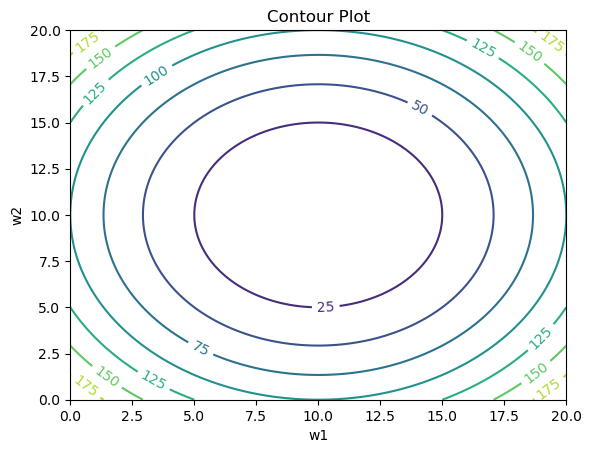

In [4]:

import matplotlib.pyplot as plt
import numpy as np

#function
def J(w1,w2):
    return (w1 - 10)**2 + (w2 - 10)**2

#meshgrid for w1 amd w2
x = np.linspace(0,20,100)
y = np.linspace(0,20,100)
X,Y = np.meshgrid(x,y)
Z = np.zeros(10000).reshape(100,100)

#create 2d array for Z also , 
for i in range(100):
    for j in range(100):
        Z[i][j] += J(X[i][j],Y[i][j]) 

#Plot the contour curve
fig = plt.figure()
ax = fig.add_subplot(111)
cp = plt.contour(X,Y,Z)
plt.clabel(cp,fontsize = 10)
plt.xlabel("w1")
plt.ylabel("w2")
plt.title("Contour Plot")

plt.show()

<font size = 4>**QUESTION 3**</font>

3. Using line (unidirectional) search, for the function (w1 - 10 )^2 + (w2 - 10)^2, find the minimum value along the direction (2, 5). You can assume the start point to be (2,1).  Plot the function and its contours along with the minimum value in that direction.

In [5]:
#first apply bracketing method to refine search space 

def J(w1,w2):
    return (w1 - 10)**2 + (w2 - 10)**2


#START POINTS
s1 = 2
s2 = 1

#This WILL BE THE initial range of search of alpha
a = -100
b = 100

#This is the direction vector
d1 = 2
d2 = 5

#bracketing in the range -100 to 100 FOR ALPHA
for x in range(-98,100,2):
    w1 = x - 2
    w2 = x
    w3 = x + 2
    if(J(s1 + w2*d1,s2 + w2*d2) <= J(s1 + w1*d1,s2 + w1*d2) 
       and J(s1 + w2*d1,s2 + w2*d2) <= J(s1 + w3*d1,s2 + w3*d2)):
        a = w1
        b = w3
        break
        
        
print(f"Refined search space is from alpha value from {a} to {b}")

Refined search space is from alpha value from 0 to 4


In [6]:
#Now we can apply interval halving method 

#Epsilon set to small value
e = 1e-6

#Interval halving done till the interval is less than epsilon
while(b - a > e):
    L = b - a
    w1 = a + L/4
    w2 = b - L/4
    wm = (a+b)/2
    
    if(J(s1 + w1*d1,s2 + w1*d2) < J(s1 + wm*d1,s2 + wm*d2)):
        b = wm
        wm = w1
    elif(J(s1 + w2*d1,s2 + w2*d2) < J(s1 + wm*d1,s2 + wm*d2)):
        a = wm
        wm = w2
    else:
        a = w1
        b = w2

alpha = (a+b)/2

print(f"The minimum value occurs at the alpha value {(a+b)/2} for the direction (2,5) with start point (2,1)")
print(f"w1 = {s1 + alpha*d1} and w2 = {s2 + alpha*d2}")

The minimum value occurs at the alpha value 2.1034483909606934 for the direction (2,5) with start point (2,1)
w1 = 6.206896781921387 and w2 = 11.517241954803467


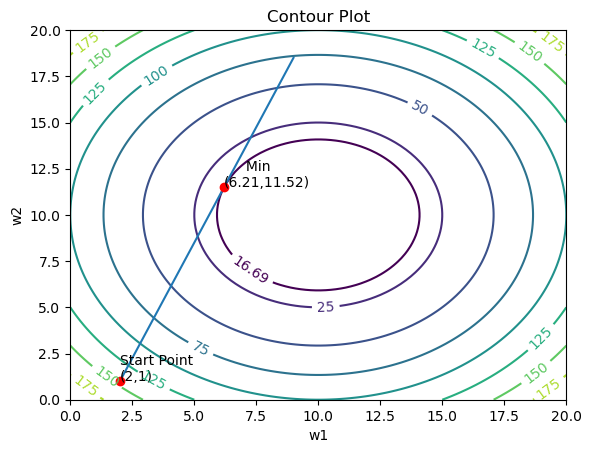

In [7]:

import matplotlib.pyplot as plt
import numpy as np

def J(w1,w2):
    return (w1 - 10)**2 + (w2 - 10)**2

x = np.linspace(0,20,100)
y = np.linspace(0,20,100)
X,Y = np.meshgrid(x,y)
Z = np.zeros(10000).reshape(100,100)

#Find the Z values
for i in range(100):
    for j in range(100):
        Z[i][j] += J(X[i][j],Y[i][j]) 
        

#Below is for the unidirection line x,y values for plotting it
t = np.linspace(0,3.5,100)
linex = np.zeros(100)
liney = np.zeros(100)
for i in range(100):
    linex[i] = s1 + d1*t[i]
    liney[i] = s2 + d2*t[i]
    

#plotting
fig = plt.figure()
ax = fig.add_subplot(111)
cp1 = plt.contour(X,Y,Z)
cp2 = plt.contour(X,Y,Z,levels = [J(s1+alpha*d1,s2+alpha*d2)])

#Line plot 
plt.plot(linex,liney)

#plot the minimum point with red
plt.plot(s1+alpha*d1,s2+alpha*d2,"ro")
plt.text(s1+alpha*d1,s2+alpha*d2,f"     Min\n({round(s1+alpha*d1,2)},{round(s2+alpha*d2,2)})")

#plot the start point
plt.plot(2,1,"ro")
plt.text(2,1,f"Start Point\n(2,1)")

#Set the contour labels
plt.clabel(cp1,fontsize = 10)
plt.clabel(cp2,fontsize = 10)

#xlabel , ylabel , title
plt.xlabel("w1")
plt.ylabel("w2")
plt.title("Contour Plot")

plt.show()